## Observations and Insights 

1. 
2. 
3. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_dataset_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number = len(mouse_dataset_df['Mouse ID'].unique())
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = mouse_dataset_df[mouse_dataset_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_ID['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_dataset_df.loc[mouse_dataset_df['Mouse ID'] == "g989", :].copy()
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexNames = mouse_dataset_df[mouse_dataset_df['Mouse ID'] == "g989"].index

clean_mouse_dataset_df = mouse_dataset_df.drop(indexNames)

In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = len(clean_mouse_dataset_df['Mouse ID'].unique())
new_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drugs_obj = clean_mouse_dataset_df.groupby('Drug Regimen')

mean = drugs_obj['Tumor Volume (mm3)'].mean()
median = drugs_obj['Tumor Volume (mm3)'].median()
variance = drugs_obj['Tumor Volume (mm3)'].var()
standard_deviation = drugs_obj['Tumor Volume (mm3)'].std()
SEM = drugs_obj['Tumor Volume (mm3)'].sem()

summary_statistics_df = pd.DataFrame({
    "Average Tumor Volume (mm3)": mean,
    "Median Tumor Volume (mm3)": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Standard Deviation": standard_deviation,
    "Tumor Volume SEM": SEM})

summary_statistics_df

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_statistics_df2 = clean_mouse_dataset_df.groupby('Drug Regimen', as_index = False).agg({'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})

#additional formatting to match the above summary_statistics_df, 'Drug Regimen' included as a separate column this time because it looks better
summary_statistics_df2.columns = summary_statistics_df2.columns.droplevel(level=1)
summary_statistics_df2.columns = ["Drug Regimen", "Average Tumor Volume (mm3)", "Median Tumor Volume (mm3)", "Tumor Volume Variance", "Tumor Volume Standard Deviation", "Tumor Volume SEM"]

summary_statistics_df2

,Drug Regimen,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

### Solution 1 
The two bar graphs below show the "expected" outcome for this task. 

What they really represent is the total amount of times all mice subjected to a specific drug regimen have had the Tumor Volume measurement taken.

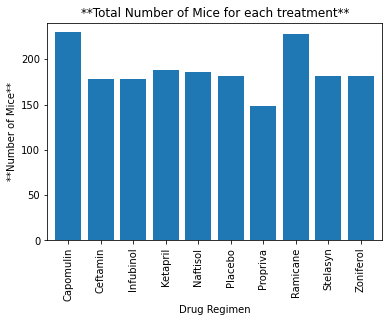

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
non_unique_mice_and_drug_df = clean_mouse_dataset_df[['Mouse ID','Drug Regimen']]

mice_and_drug_df = non_unique_mice_and_drug_df.groupby('Drug Regimen').count()

m_d_plot = mice_and_drug_df.plot(kind="bar", figsize=(6,4), width = 0.8, legend=False)

m_d_plot.set_ylabel('**Number of Mice**')
m_d_plot.set_title('**Total Number of Mice for each treatment**')

plt.ylim(0, max(mice_and_drug_df['Mouse ID'])+10)

plt.show()

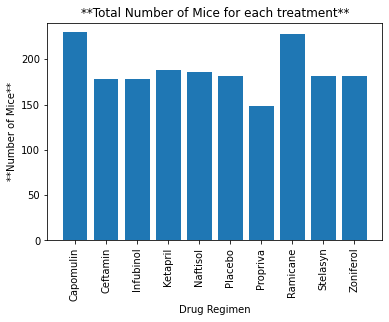

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = mice_and_drug_df.index
y_axis = mice_and_drug_df['Mouse ID']

plt.bar(x_axis, y_axis, align="center")

plt.xticks(x_axis, rotation=90)

plt.title('**Total Number of Mice for each treatment**')
plt.xlabel("Drug Regimen")
plt.ylabel('**Number of Mice**')

plt.ylim(0, max(mice_and_drug_df['Mouse ID'])+10)

plt.show()

### Solution 2 
The two bar graphs below show the outcome for this task which actually represents what the instructions are asking for - the total amount of mice subjected to a specific drug regimen at the beginning of the study.

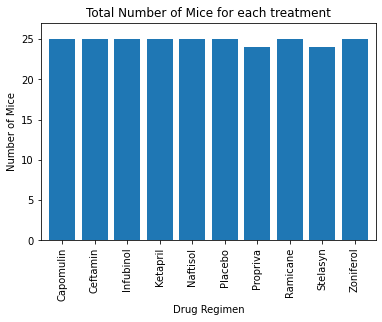

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
unique_mice_and_drug_df = clean_mouse_dataset_df[['Mouse ID','Drug Regimen']].drop_duplicates()

mice_and_drug_df2 = unique_mice_and_drug_df.groupby('Drug Regimen').count()

m_d_plot2 = mice_and_drug_df2.plot(kind="bar", figsize=(6,4), width = 0.8, legend=False)

m_d_plot2.set_ylabel("Number of Mice")
m_d_plot2.set_title("Total Number of Mice for each treatment")

plt.ylim(0, max(mice_and_drug_df2['Mouse ID'])+ 2)

plt.show()

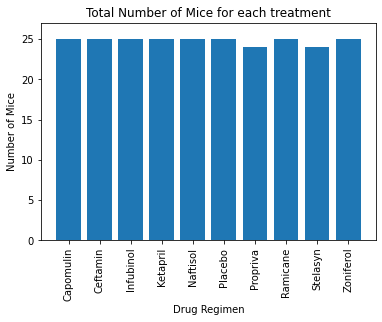

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = mice_and_drug_df2.index
y_axis = mice_and_drug_df2['Mouse ID']

plt.bar(x_axis, y_axis, align="center")

plt.xticks(x_axis, rotation=90)

plt.title("Total Number of Mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.ylim(0, max(mice_and_drug_df2['Mouse ID'])+ 2)

plt.show()

### Solution 3 
The bar graph below represents my interpretation of the instructions - the total amount of mice subjected to a specific drug regimen at each timepoint of study (*throughout* the course of the study). It looks like some of the mice didn't make it till the end of the study :(.

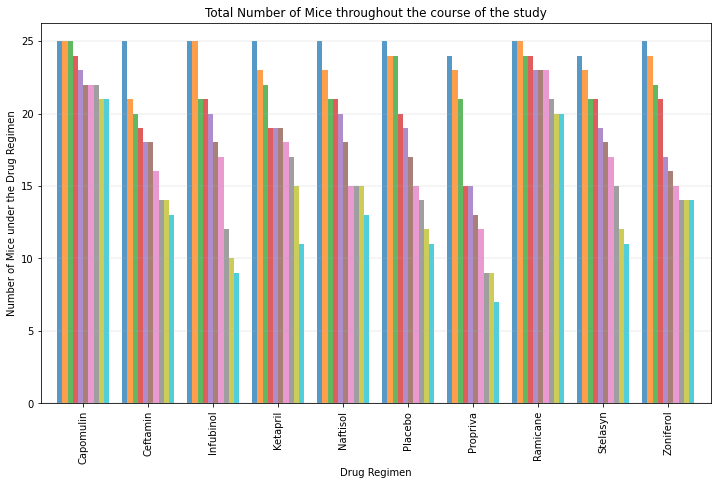

In [13]:
new_mice_and_drug_df = clean_mouse_dataset_df[['Drug Regimen','Timepoint', 'Mouse ID']]

mice_and_drug_df3 = new_mice_and_drug_df.groupby(['Drug Regimen', 'Timepoint']).count()

m_d_plot3 = mice_and_drug_df3.unstack(level=1).plot(kind='bar', figsize=(12,7), width = 0.8, alpha=0.75, legend=False)

m_d_plot3.set_ylabel("Number of Mice under the Drug Regimen")
m_d_plot3.set_title("Total Number of Mice throughout the course of the study")

m_d_plot3.yaxis.grid(True, linestyle='-', linewidth=0.25)

plt.show()

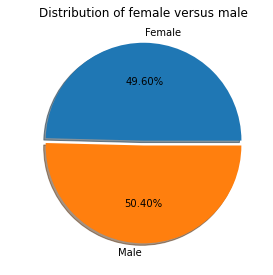

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice_and_sex_df = clean_mouse_dataset_df[['Mouse ID','Sex']].drop_duplicates()
mice_and_sex_df = unique_mice_and_sex_df.groupby('Sex').count()

m_s_plot = mice_and_sex_df.plot(kind="pie", autopct='%1.2f%%', explode=[0.05, 0], y='Mouse ID', title=("Distribution of female versus male"), figsize=(4.5,4.5), legend=False, shadow=True)
m_s_plot.set_ylabel(" ")

plt.show()

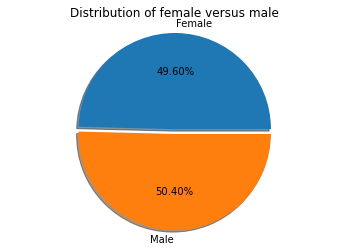

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_and_sex_df.index
sizes = mice_and_sex_df['Mouse ID']
explode = (0.05, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%", shadow=True)

plt.axis("equal")
plt.title("Distribution of female versus male")

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_mouse_dataset_df.groupby('Mouse ID').agg(Timepoint=('Timepoint', 'max'))
greatest_timepoint_df = greatest_timepoint_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_vol_df = pd.merge(greatest_timepoint_df, clean_mouse_dataset_df, on=['Mouse ID', 'Timepoint'])
max_tumor_vol_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
total_quartiles = max_tumor_vol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

total_lowerq = total_quartiles[0.25]
total_upperq = total_quartiles[0.75]

total_iqr = total_upperq-total_lowerq

total_lower_bound = total_lowerq - (1.5*total_iqr)
total_upper_bound = total_upperq + (1.5*total_iqr)

print(f'\nFinal tumor volume values below {round(total_lower_bound,6)} and above {round(total_upper_bound,6)} could be outliers.')

outlier_table = max_tumor_vol_df.loc[(max_tumor_vol_df['Tumor Volume (mm3)'] < total_lower_bound) | (max_tumor_vol_df['Tumor Volume (mm3)'] > total_upper_bound)]

print(f'\nThere are {len(outlier_table)} potential outliers in the Final Tumor Volume values in the dataset containing records for all drug regimens.\n')


Final tumor volume values below 17.109231 and above 93.82026 could be outliers.

There are 0 potential outliers in the Final Tumor Volume values in the dataset containing records for all drug regimens.



In [18]:
for treatment in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = max_tumor_vol_df.loc[max_tumor_vol_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(tumor_vol.values.tolist())
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers_table = [tumor for tumor in tumor_vol if tumor < lower_bound or tumor > upper_bound]
    print(f'\nFinal tumor volume values below {round(lower_bound,6)} and above {round(upper_bound,6)} could be outliers for {treatment}.')
    print(f'There is/are {len(outliers_table)} potential outlier/s in the Final Tumor Volume values in {treatment} dataset.\n')


Final tumor volume values below 20.704562 and above 51.832015 could be outliers for Capomulin.
There is/are 0 potential outlier/s in the Final Tumor Volume values in Capomulin dataset.


Final tumor volume values below 17.912664 and above 54.306811 could be outliers for Ramicane.
There is/are 0 potential outlier/s in the Final Tumor Volume values in Ramicane dataset.


Final tumor volume values below 36.832905 and above 82.741446 could be outliers for Infubinol.
There is/are 1 potential outlier/s in the Final Tumor Volume values in Infubinol dataset.


Final tumor volume values below 25.35545 and above 87.666458 could be outliers for Ceftamin.
There is/are 0 potential outlier/s in the Final Tumor Volume values in Ceftamin dataset.



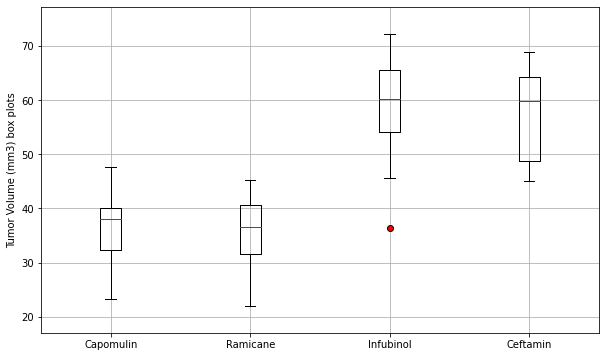

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#pandas version

tumor_vol_box_df = pd.DataFrame(tumor_vol_data)
tumor_vol_box_df = tumor_vol_box_df.transpose()
tumor_vol_box_df.columns = [treatments_list]

#t_v_plot = tumor_vol_box_df[[treatments_list]].plot(kind='box', figsize=(8,6), color=dict(boxes='black', whiskers='black', medians='r', caps='black'), flierprops=dict(markeredgecolor='black', markerfacecolor='r'))

t_v_plot = tumor_vol_box_df.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], figsize=(10,6), color=dict(boxes='black', whiskers='black', medians='r', caps='black'), flierprops=dict(markeredgecolor='black', markerfacecolor='r'), widths=(0.15, 0.15, 0.15, 0.15))

t_v_plot.set_ylabel("Tumor Volume (mm3) box plots")
t_v_plot.set_xticklabels(treatments_list)

plt.ylim(tumor_vol_box_df.to_numpy().min() - 5, tumor_vol_box_df.to_numpy().max() + 5)

plt.show()

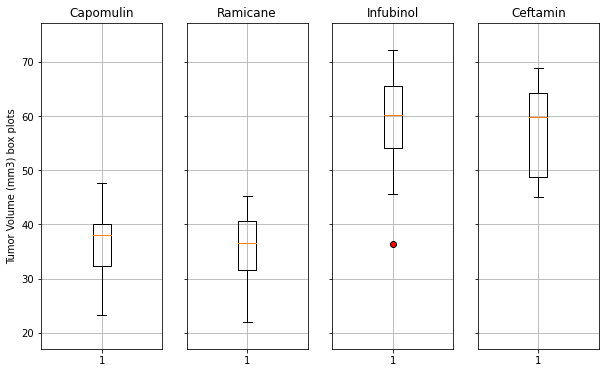

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#pyplot version

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,6), sharey=True, )

ax1.boxplot(tumor_vol_data[0], flierprops=dict(markerfacecolor='r', marker='o'))
ax2.boxplot(tumor_vol_data[1], flierprops=dict(markerfacecolor='r', marker='o'))
ax3.boxplot(tumor_vol_data[2], flierprops=dict(markerfacecolor='r', marker='o'))
ax4.boxplot(tumor_vol_data[3], flierprops=dict(markerfacecolor='r', marker='o'))

ax1.set_ylabel('Tumor Volume (mm3) box plots')
ax1.set_title(f'{treatments_list[0]}')
ax2.set_title(f'{treatments_list[1]}')
ax3.set_title(f'{treatments_list[2]}')
ax4.set_title(f'{treatments_list[3]}')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.ylim(tumor_vol_box_df.to_numpy().min() - 5, tumor_vol_box_df.to_numpy().max() + 5)

plt.show()

## Line and Scatter Plots

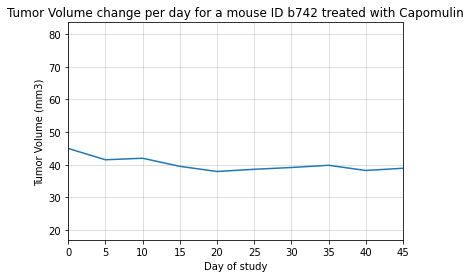

In [65]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Mouse ID is picked at random from all mice treated with Capomulin.
# Run this cell to generate plots for different mouse IDs. If they look different than the first one it's because of the %matplotlib notebook in the second cell from the bottom. 
# If needed comment out #%matplotlib notebook, and restart the Kernel before re-running this cell.

list_of_miceID_for_Capomulin = unique_mice_and_drug_df.loc[unique_mice_and_drug_df['Drug Regimen'] == 'Capomulin', 'Mouse ID']

random_mouse_ID = list_of_miceID_for_Capomulin.sample(1).values.tolist()

tumor_vs_time_df = clean_mouse_dataset_df.loc[clean_mouse_dataset_df['Mouse ID'] == random_mouse_ID[0], ['Mouse ID', 'Drug Regimen','Timepoint', 'Tumor Volume (mm3)']].copy()
tumor_vs_time_df = tumor_vs_time_df.set_index("Timepoint")

tumor_vs_time_df.plot(legend=False)

plt.title(f"Tumor Volume change per day for a mouse ID {tumor_vs_time_df['Mouse ID'].unique()[0]} treated with {tumor_vs_time_df['Drug Regimen'].unique()[0]}")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Day of study")

plt.grid(alpha=0.5)

plt.xlim(0, 45)
plt.ylim(clean_mouse_dataset_df['Tumor Volume (mm3)'].min() - 5, clean_mouse_dataset_df['Tumor Volume (mm3)'].max() + 5)

plt.show()

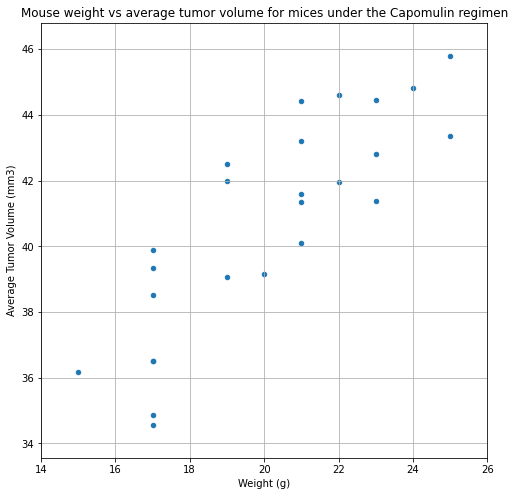

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_vs_avg_tumor_vol_df = clean_mouse_dataset_df.loc[clean_mouse_dataset_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

weight_vs_tumor_df = weight_vs_avg_tumor_vol_df.groupby('Mouse ID').agg(Weight=('Weight (g)', 'mean'), Avg_Tumor_Vol=('Tumor Volume (mm3)', 'mean'))

w_t_plot = weight_vs_tumor_df.plot(kind="scatter", x="Weight", y="Avg_Tumor_Vol", grid=True, figsize=(8,8),
                        title="Mouse weight vs average tumor volume for mices under the Capomulin regimen")

w_t_plot.set_xlabel("Weight (g)")
w_t_plot.set_ylabel("Average Tumor Volume (mm3)")

plt.xlim(weight_vs_tumor_df['Weight'].min() - 1, weight_vs_tumor_df['Weight'].max() + 1)
plt.ylim(weight_vs_tumor_df['Avg_Tumor_Vol'].min() - 1, weight_vs_tumor_df['Avg_Tumor_Vol'].max() + 1)

plt.show()

## Correlation and Regression


The correlation between mouse weight and average tumor volume is 0.84.

The r-squared is: 0.71


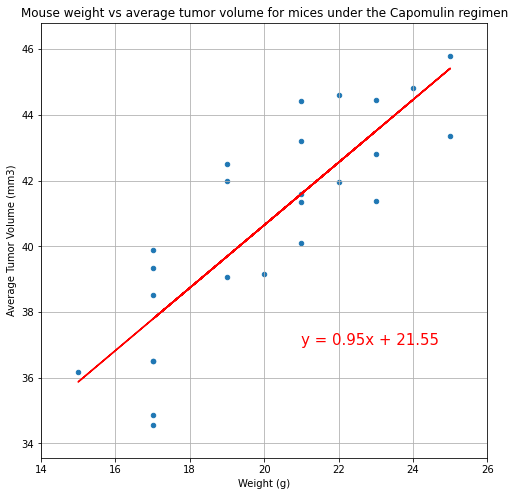

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = weight_vs_tumor_df.Weight
avg_tumor_vol = weight_vs_tumor_df.Avg_Tumor_Vol

print(f"\nThe correlation between mouse weight and average tumor volume is {round(st.pearsonr(weight,avg_tumor_vol)[0],2)}.\n")

slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, avg_tumor_vol)

print(f"The r-squared is: {round(rvalue**2,2)}")

weight_vs_tumor_df['regress_values'] = weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

w_t_plot2 = weight_vs_tumor_df.plot(kind="scatter", x="Weight", y="Avg_Tumor_Vol", grid=True, figsize=(8,8),
                        title="Mouse weight vs average tumor volume for mices under the Capomulin regimen")

plt.xlim(weight_vs_tumor_df['Weight'].min() - 1, weight_vs_tumor_df['Weight'].max() + 1)
plt.ylim(weight_vs_tumor_df['Avg_Tumor_Vol'].min() - 1, weight_vs_tumor_df['Avg_Tumor_Vol'].max() + 1)

weight_vs_tumor_df.plot.line(x='Weight', y='regress_values', ax=w_t_plot2, color="red", legend = False)

plt.annotate(line_eq,(21,37),fontsize=15,color="red")
plt.grid()

w_t_plot2.set_xlabel("Weight (g)")
w_t_plot2.set_ylabel("Average Tumor Volume (mm3)")

plt.show()

### Alternative Solution
The scatter graph below shows the same data as the two graphs above, however this time the linear regression model is plotted directly on top of the previous scatter plot, as per the instructions. 

(33.559143395, 46.798969507500004)

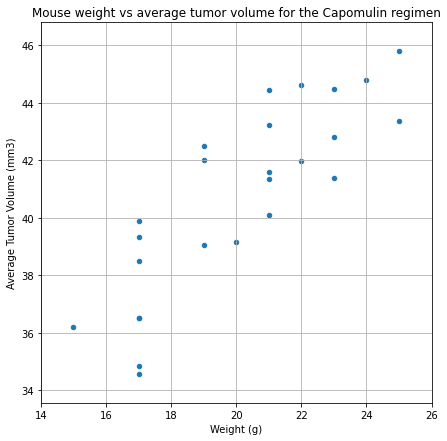

In [24]:
#%matplotlib notebook

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
w_t_plot3 = weight_vs_tumor_df.plot(kind="scatter", x="Weight", y="Avg_Tumor_Vol", grid=True, figsize=(7,7),
                        title="Mouse weight vs average tumor volume for the Capomulin regimen")

w_t_plot3.set_xlabel("Weight (g)")
w_t_plot3.set_ylabel("Average Tumor Volume (mm3)")

plt.xlim(weight_vs_tumor_df['Weight'].min() - 1, weight_vs_tumor_df['Weight'].max() + 1)
plt.ylim(weight_vs_tumor_df['Avg_Tumor_Vol'].min() - 1, weight_vs_tumor_df['Avg_Tumor_Vol'].max() + 1)


In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight_vs_tumor_df.plot.line(x='Weight', y='regress_values', ax=w_t_plot3, grid=True, color="red", legend = False)

plt.annotate(line_eq,(21,37),fontsize=15,color="red")

plt.show()